# Statistical hypothesis testing
<br>
Statistical hypothesis testing provides the tools to 
to make quantified decisions about the data under study. In principle, it can be said that in many cases statistical tests try to reveal whether the data obtained are the result of chance or whether the opposite is the case. This is the purpose of rejecting or accepting the null hypothesis, but both cases can be good or bad news, depending on the assumption made. 

# ANOVA

The ANOVA test can be viewed as a generalization of a two-sample t-test for agreement of means on more than two samples. <br>
The solution of using t-test for all pairs for all samples we need to test would accumulate the type I error (false positive finding or mistaken rejection of null hypothesis) . https://web.vscht.cz/~spiwokv/statistika/skripta.pdf page 67.

Example:<br>
Let's test whether music has effect on the growth of plants. The experiment setting is as follows we have 500 plants (500 factors) divided to group of fives that while growing were in the box with certain type of music, then we have a control group of 5 that was not exposed to the influence of music at all. Now we want to do statistical testing ($\alpha$ = 0.05) and see what type of music, if any made the plants grow faster and thus be higher at the moment of the testing. Let's pretend that in the following table we have accumulated all the measurements and simulate them by random sampling from a certain distribution.

In [ ]:

df <- as.data.frame(matrix(rnorm(505, 30, 4), ncol=101 ))
colnames(df) <- c('control', paste('plnt', 1:100))
df

control,plnt 1,plnt 2,plnt 3,plnt 4,plnt 5,plnt 6,plnt 7,plnt 8,plnt 9,⋯,plnt 91,plnt 92,plnt 93,plnt 94,plnt 95,plnt 96,plnt 97,plnt 98,plnt 99,plnt 100
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26.22651,35.13713,35.63598,22.16616,37.93321,26.41228,35.15787,32.73665,23.07722,39.21277,⋯,28.89811,23.57016,27.63775,25.24876,30.76094,27.09803,28.81318,33.46160,32.79284,26.34843
33.90538,27.10591,37.04246,22.81403,28.66849,34.07826,26.19925,29.77665,31.82607,31.52026,⋯,34.38924,32.72627,27.39166,34.29395,30.70695,36.00697,27.07444,29.12214,30.77516,30.48505
31.85885,30.68657,27.96502,29.74624,28.69596,28.40873,22.73275,32.29791,29.34702,23.99567,⋯,29.66058,29.07677,34.72876,27.60583,25.95203,32.25062,29.36617,36.68255,30.96338,29.19239
26.09990,26.08475,27.72784,29.41107,28.92090,32.94920,34.06103,37.42951,24.79689,33.75582,⋯,33.62539,27.73249,37.03556,31.94674,34.14151,27.02495,26.24346,35.96263,32.71111,25.65883
32.25854,24.09944,41.96377,29.11409,29.24120,29.87515,26.62051,31.13784,28.73805,22.85985,⋯,32.29167,27.53900,29.99087,29.55804,31.01432,32.80514,31.15290,36.21894,29.74974,25.15069


Now let's see how many p-values would fall into our α = 0.05 level of significance region. For the simplicity sake we would do a pair t-test just between control group and all sample groups.

In [ ]:
p_vals <- c()
for (i in 2:101){
  result <- t.test(df$control, df[,i], alternative='greater')
  p_vals <-c(p_vals, result$p.value) # list of components - names(result)
}

mask <- ( p_vals < 0.05 )
p_vals[mask]

[1] 0.03696587 0.04328719

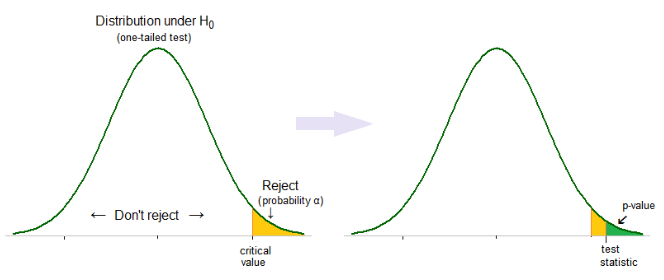

We can compute the probability that we fail to reject null hypothesis at least once:

In [ ]:
print('the probability that we do not always correctly reject the null hypothesis of 100 types of music genres influence:')
0.95^100
print('and at least once:')
1 - 0.95^100

[1] "the probability that we do not always correctly reject the null hypothesis"


[1] 0.005920529

[1] "and at least once:"


[1] 0.9940795

Solution is to use ANOVA and first test the influence of music as whole on the whole dataset.

In [ ]:
 summary(aov(formula=values~ind, data=(stack(df))))

             Df Sum Sq Mean Sq F value Pr(>F)
ind         100   1702   17.02   1.047  0.372
Residuals   404   6564   16.25               

The result of ANOVA is p-value > 0.05. We can not reject null hypothesis on the 95% significance level.

Analysis of variance (ANOVA) is a method to compare the means of several populations, based on random, independent samples from each population. It is a parametric test that assumes a normal distribution of values and homoscedasticity (standard deviations of the groups are all equal).
<br><br>
$
H_0: \mu_1 = \mu_2 = ... = \mu_j
$
<br><br>
$
H_1:$ at least one population mean $\mu_j$ differs from others
<br><br><br>
The test statistic is as follows:
<br><br>
$
F = \frac{\frac{SS_B}{f_b}}{\frac{SS_W}{f_w}} = \frac{MSS_b}{MSS_W}
$

Sum of Squares between groups:<br><br>
$
SS_b = SS_t -SS_w
$
<br><br>
Total Sum of Squares:<br><br>
$
SS_T = \sum_{i=1}^N (x_{i} - \bar{x}_j)^2
$
<br><br>
Sum of Squares within groups:<br><br>
$
SS_W = \sum_{j=1}^J \sum_{i=1}^N (x_{ij} - \bar{x}_j)^2
$

Notice that the test statistic for an ANOVA is denoted as F. Basicaly it is a ratio of variance caused by a treatment to variance due to random chance.
<br>
<br>



### F distribution

![image](http://www.countbio.com/web_pages/left_object/R_for_biology/R_biostatistics_part-1/figures_and_scripts/F_distribution1.png)

*picture from: http://www.countbio.com/web_pages/left_object/R_for_biology/R_biostatistics_part-1/figures_and_scripts/F_distribution1.png*

In [225]:
install.packages("sjPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘xtable’, ‘emmeans’, ‘lme4’, ‘ggeffects’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




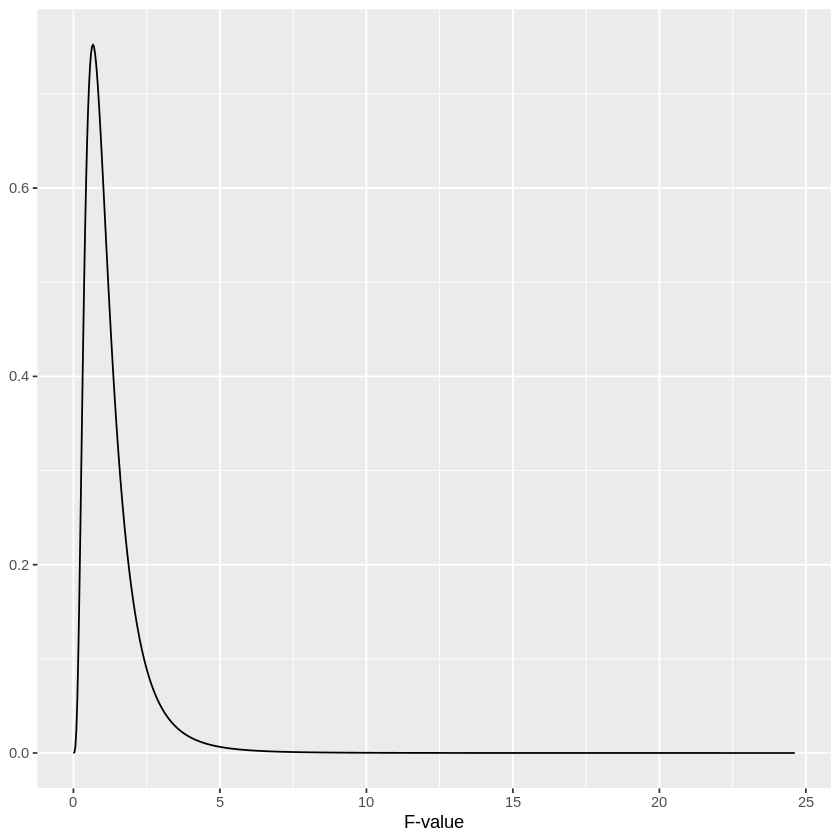

In [231]:
library('sjPlot')

dist_f(deg.f1=10, deg.f2=10)

### ANOVA manualy
<br>
Example
<br>
https://web.vscht.cz/~spiwokv/statistika/skripta.pdf str 69: <br>
Let's create three batches of sample, one for the control, one for the test compound and one 
for the placebo. The null hypothesis is that the means of all three categories are the same. The alternative hypothesis is that at least one mean is different. We start by creating the data:

In [240]:
control <- rnorm(10, mean=100, sd=25)
compound <- rnorm(10, mean=70, sd=30)
placebo <- rnorm(10, mean=90, sd=25)
print(control)
print(rep('-', 15))
print(compound)
print(rep('-', 15))
print(placebo)

 [1] 112.73185 100.33132 107.57421  98.79740 100.38375 112.62641 117.43373
 [8] 123.66538  78.91631  89.20990
 [1] "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-"
 [1]  87.44202  63.86666  66.01167  66.94558  27.72351  77.51812  54.36347
 [8] 105.28203  71.29319 101.05900
 [1] "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-" "-"
 [1] 155.13711  82.96036  84.10800  85.71663  75.44912  80.07264 112.92193
 [8] 147.37294 115.72377  83.60280


In [241]:
# Here we compute sum of squares of deviation from mean in each group
ss_control <- sum((control-mean(control))^2)
ss_compound <- sum((compound-mean(compound))^2)
ss_placebo <- sum((placebo-mean(placebo))^2)

# Then we sum values computed above and name the variable Sum of Squares Within the groups
SSW <- ss_control + ss_compound + ss_placebo
SSW

[1] 13913.14

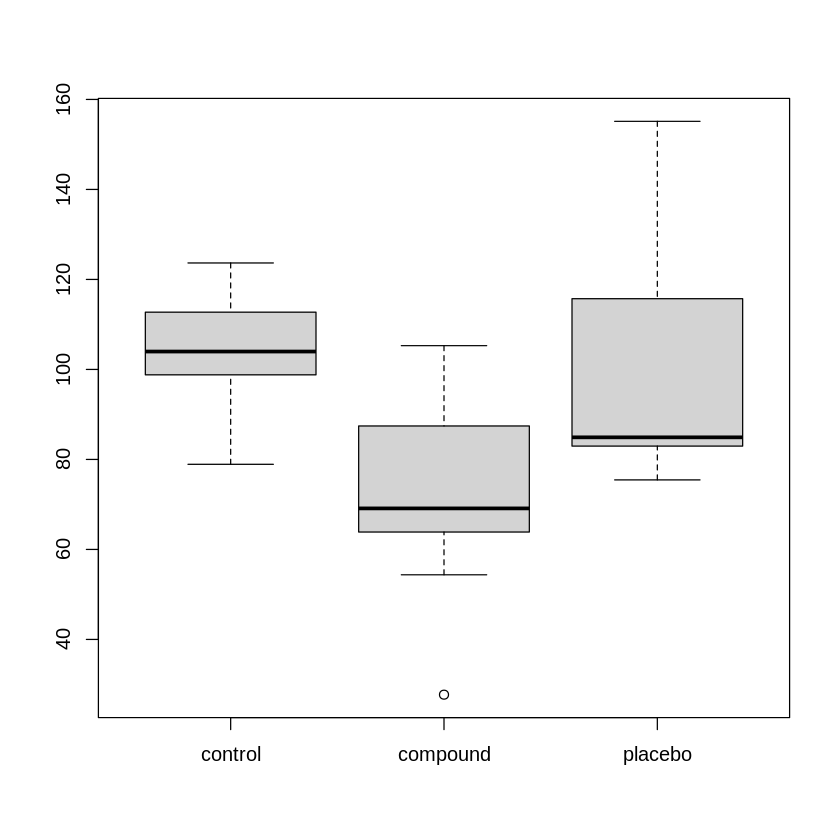

In [242]:
# Boxplots to have a visual control how the data looks like

boxplot(data.frame(control, compound, placebo ))

In [243]:
# Concatenate all groups into one

all_groups <- c(control, compound, placebo)
all_groups

[1] 112.73185 100.33132 107.57421  98.79740 100.38375 112.62641 117.43373
 [8] 123.66538  78.91631  89.20990  87.44202  63.86666  66.01167  66.94558
[15]  27.72351  77.51812  54.36347 105.28203  71.29319 101.05900 155.13711
[22]  82.96036  84.10800  85.71663  75.44912  80.07264 112.92193 147.37294
[29] 115.72377  83.60280

In [244]:
# And compute sum of squares of deviation from mean of this big group
# calling the variable SST - Sum of Squares Total

SST <- sum((all_groups - mean(all_groups))^2)
SST

[1] 20372.82

This value is greater than or equal to SSW. If SSW and SST are nearly equal, then either their means are close or the variances are high compared to the differences in means. 


In [245]:
# Compute difference of these values - SSB, Sum of Squares Between groups

SSB <- SST - SSW
SSB

[1] 6459.675

In [246]:
# Finaly we need to compute F criterion
# Value of 27 is first degree of freedom: number of measurments - number of groups
# Value of 2 ks second degree of freedom: number of categories - 1

Fe <- (SSB*27)/(SSW*2)
Fe

[1] 6.267859

In [248]:
# le't get the criterion threshold for our degrees of freedom

qf(p=0.95, df1=2, df2=27)

[1] 3.354131

The obtained value is lower then F, we can refuse null hypothesis. There is a difference between the three groups.

Let' try with r aov() function.



In [42]:
labels <- gl(3, 10)
labels

[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

In [41]:
model <- aov(all_groups ~ labels)
model

Call:
   aov(formula = all_groups ~ labels)

Terms:
                   labels Residuals
Sum of Squares   8230.196 14049.226
Deg. of Freedom         2        27

Residual standard error: 22.811
Estimated effects may be unbalanced

In [44]:
summary(model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
labels       2   8230    4115   7.908 0.00198 **
Residuals   27  14049     520                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

At this moment we know there is a difference between the three groups, but we don't know what groups differ. Ultimately we would like to find out, whether the compound we used as a new drug works. We know that using pair test is not the best method, the solution is to use Tukey test HSD (Honest significance Difference) - TukeyHSD().

In [45]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = all_groups ~ labels)

$labels
         diff        lwr       upr     p adj
2-1 -39.33339 -64.626890 -14.03988 0.0018153
3-1 -11.05316 -36.346660  14.24035 0.5322422
3-2  28.28023   2.986725  53.57373 0.0261040


This test will do pair comparison and if the p adj is lower then chosen $\alpha$ We can consider these groups as differing. In our case $\alpha$ = 0.05, so from the table we can see that group 2-1 and 3-2 are different, that means that test showed significant difference between drug and other groups. 

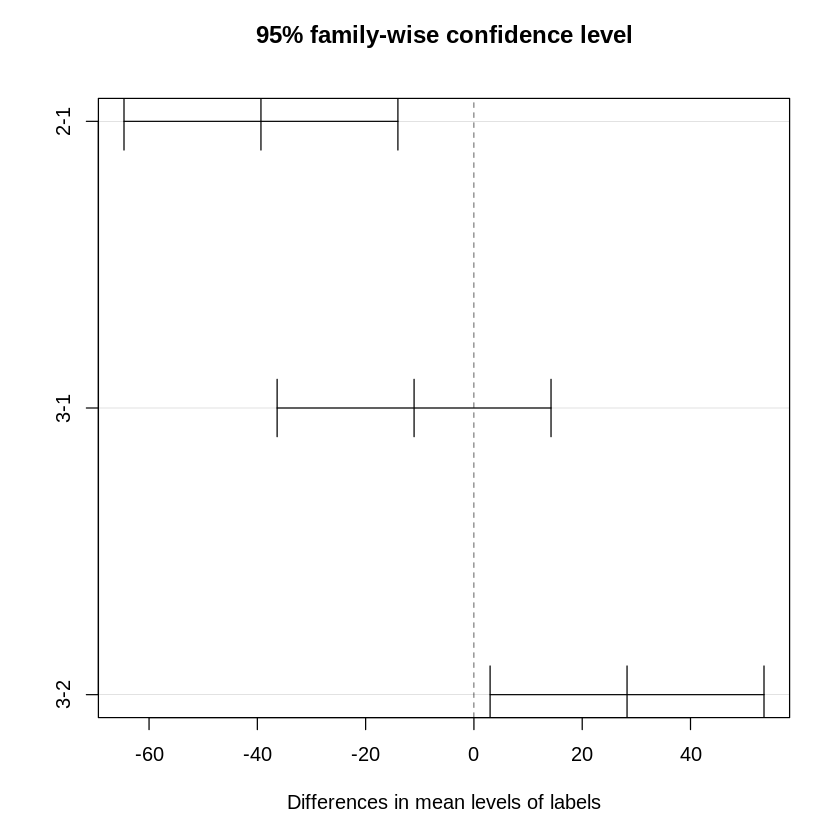

In [46]:
# We can also plot the output of the TukeyHSD test

plot(TukeyHSD(model))

Here we can see the corresponding confidence intervals for the differences of the individual means in all comparisons. If the confidence interval does not contain zero, we can reject the null hypothesis at a given significance level for a given pair and say that the two groups are significantly different from each other.

Exercise:<br>
Analyse the following salami data to decide whether there is a difference from nutrition point of view between these type of salamis.<br>

In [58]:
df_dogs <- read.csv("https://raw.githubusercontent.com/lich-uct/r_tutorial/56e08976134ebbfaa7739e244306650841c204a9/08/dogs.csv", 
                    header=T, sep =",", stringsAsFactors=T) # import the column 'Type' as factor

head(df_dogs)
dim(df_dogs)

,Type,Calories,Sodium
,<fct>,<int>,<int>
1,Beef,186,495
2,Beef,181,477
3,Beef,176,425
4,Beef,149,322
5,Beef,184,482
6,Beef,190,587


[1] 54  3

In [59]:
levels(df_dogs$Type)

[1] "Beef"    "Meat"    "Poultry"

We need to perform two types of analysis of variances, one for Calories and one for Sodium.

[1] 20

[1] 17

[1] 17

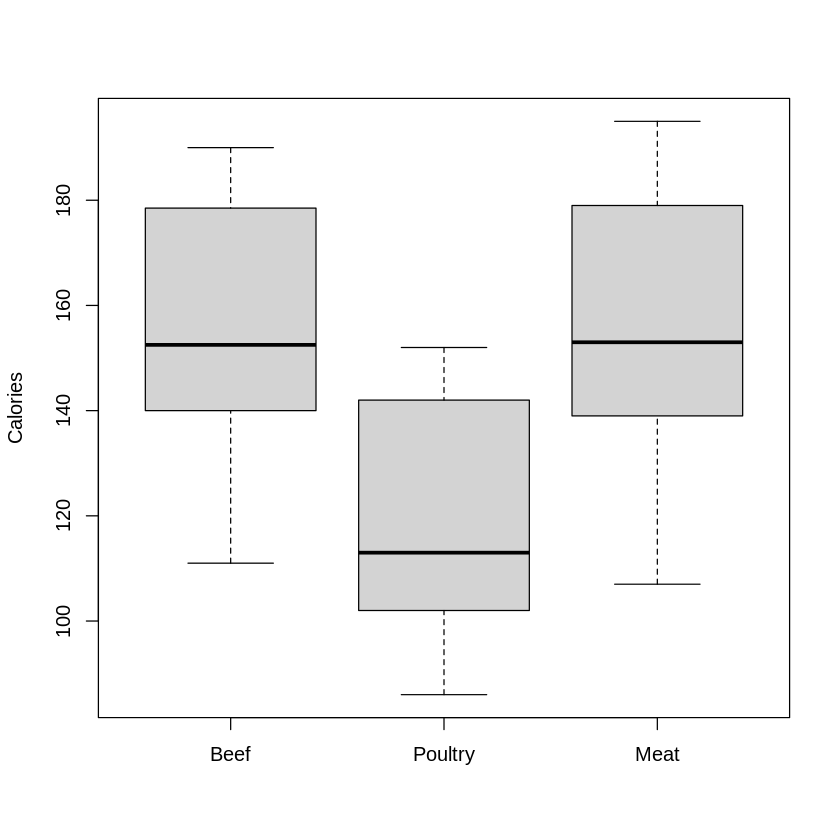

In [250]:
cals_total <- df_dogs$Calories
cals_beef <- df_dogs[df_dogs$Type == "Beef", "Calories"]
cals_poultry <- df_dogs[df_dogs$Type == "Poultry", "Calories"]
cals_meat <- df_dogs[df_dogs$Type == "Meat", "Calories"]

length(cals_beef)
length(cals_poultry)
length(cals_meat)

boxplot(
    cals_beef
    , cals_poultry
    , cals_meat
    , names = c("Beef", "Poultry", "Meat")
    , ylab = "Calories"
)

In [252]:
mean_cals_total <- mean(cals_total) 
mean_cals_beef <- mean(cals_beef) 
mean_cals_poultry <- mean(cals_poultry)
mean_cals_meat <- mean(cals_meat) 

N <- length(cals_total) 
J <- length(levels(df_dogs$Type)) #

# SS within group
ss_w <- sum(
    c(
        sum((cals_beef - mean_cals_beef)^2)
        , sum((cals_poultry - mean_cals_poultry)^2)
        , sum((cals_meat - mean_cals_meat)^2)
    )
)
# SS total
ss_t <- sum((cals_total - mean_cals_total)^2)
# SS squares between group
ss_b <- ss_t - ss_w

# degrees of freedom
f_b <- J - 1
f_w <- N - J

# F ratio
Fe = (ss_b / f_b) / (ss_w / f_w)
Fe

[1] 16.07399

In [253]:
# pf() is a tool to get distribution function for F-ditribution:

p_val <- 1 - pf(FE, f_b, f_w)
p_val

[1] 3.862072e-06

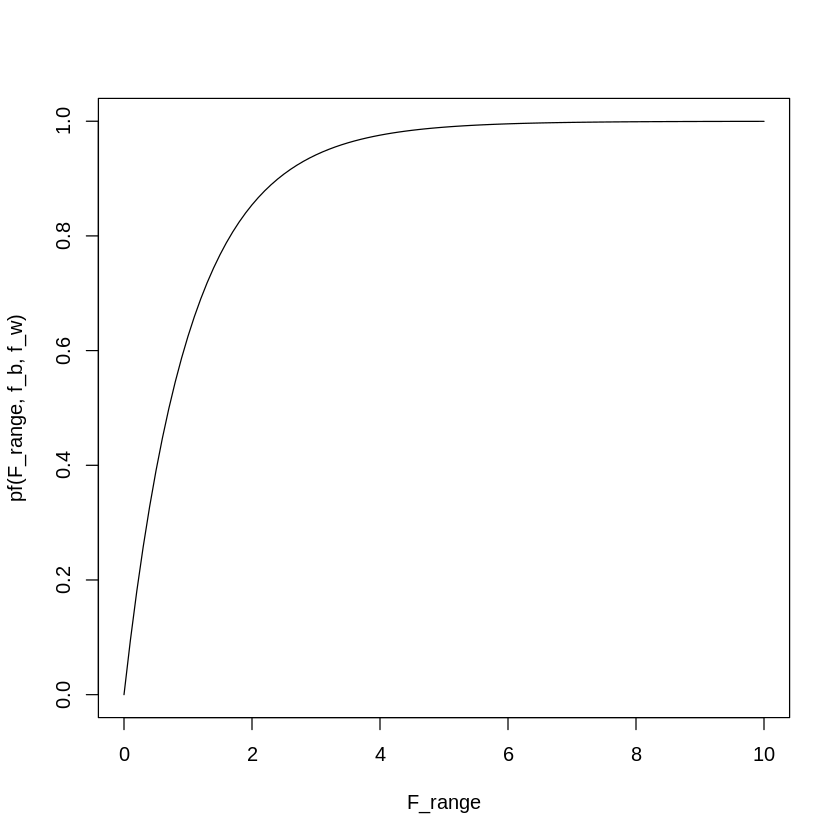

In [65]:
F_range <- seq(0, 10, 0.1)
plot(F_range, pf(F_range, f_b, f_w), type='l')

This p-value is of high statistical significance and we can refuse the null hypothesis. But again, we can only say that the groups differs, but we don't know which groups. This information can be obtained using post-hoc tests.

Now for the second tests analysis of variance. Next independent variable is amount of sodium. Let's find out whether some salami are more salty then others.

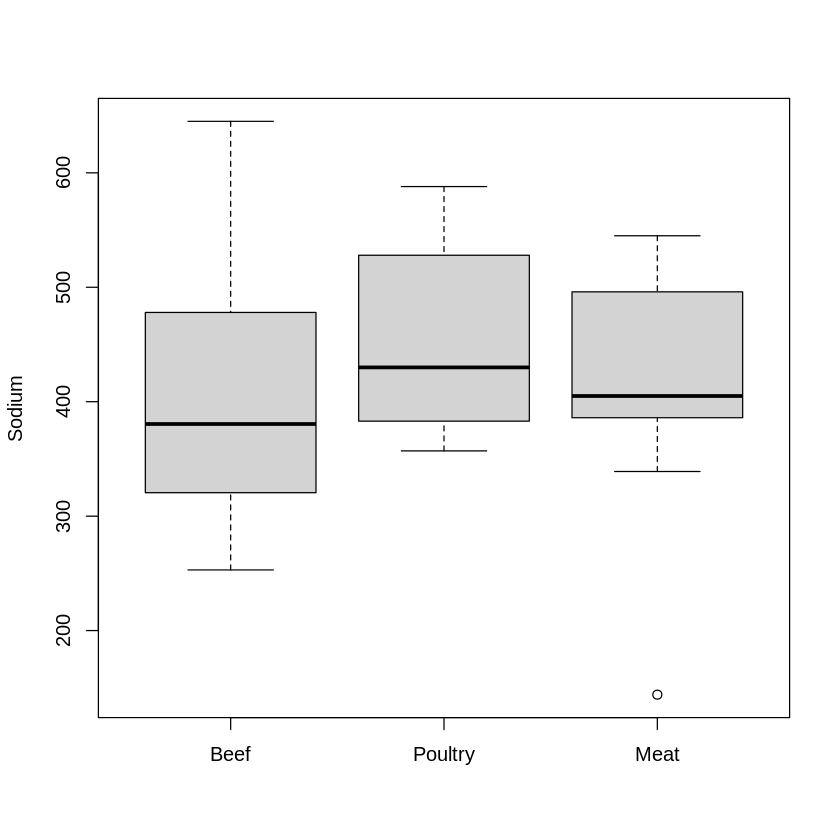

In [255]:
df_dogs_split <- split(df_dogs, df_dogs$Type)
boxplot(
    df_dogs_split$Beef$Sodium
    , df_dogs_split$Poultry$Sodium
    , df_dogs_split$Meat$Sodium
    , names = c("Beef", "Poultry", "Meat")
    , ylab = "Sodium"
)

In [262]:
test_sum <- summary(aov(df_dogs$Sodium ~ df_dogs$Type))
test_sum

             Df Sum Sq Mean Sq F value Pr(>F)
df_dogs$Type  2  31739   15869   1.778  0.179
Residuals    51 455249    8926               

In [270]:
Fe <- test_sum[[1]][1,4]

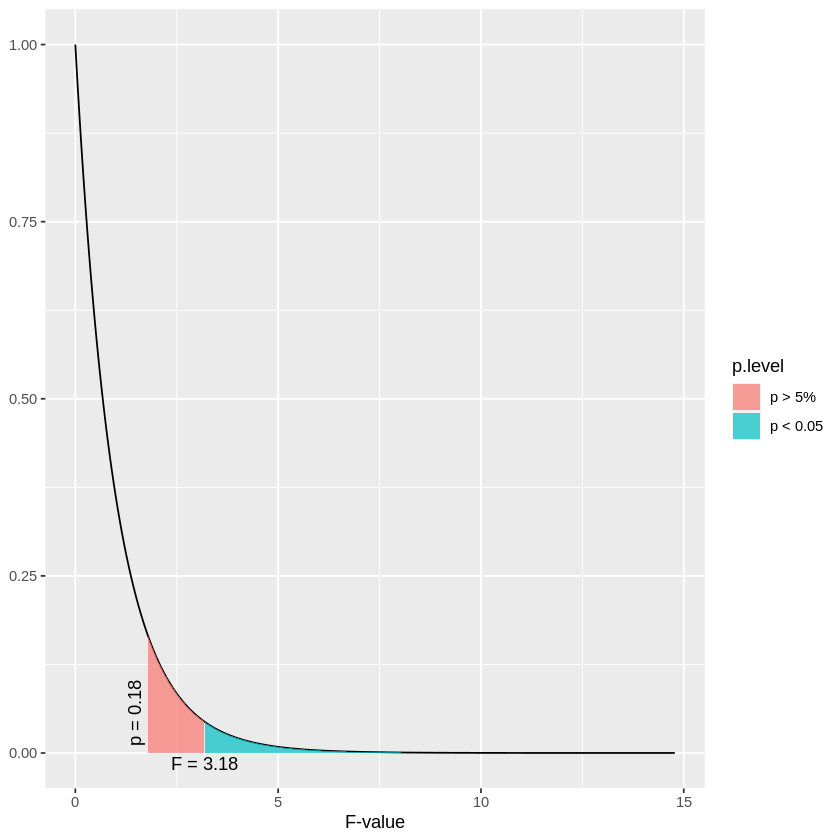

In [273]:
dist_f(f=Fe, deg.f1=2, deg.f2=51)

Here we can not refuse null hypothesis, maybe removing the outlier from the meat group could change the results of ANOVA. 

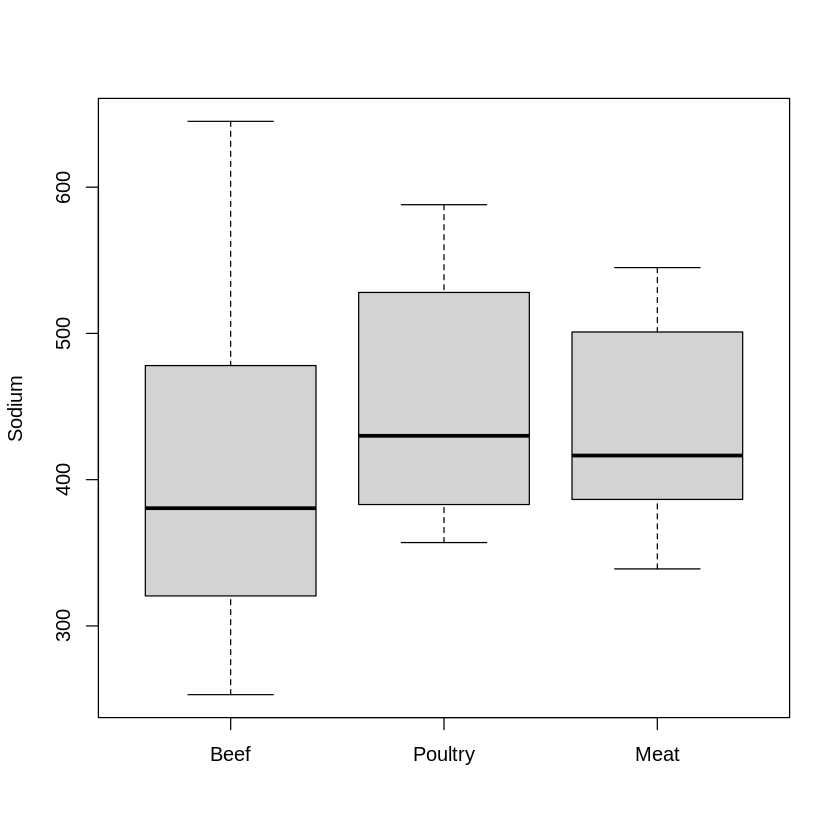

In [275]:
library('dplyr')

df_sodium_dogs <- subset(df_dogs, select=c('Type', 'Sodium'))
df_sodium_dogs <- filter(df_sodium_dogs, Sodium > 200)

df_dogs_split <- split(df_sodium_dogs, df_sodium_dogs$Type)
boxplot(
    df_dogs_split$Beef$Sodium
    , df_dogs_split$Poultry$Sodium
    , df_dogs_split$Meat$Sodium
    , names = c("Beef", "Poultry", "Meat")
    , ylab = "Sodium"
)

In [276]:
test_summary <- summary(aov(df_sodium_dogs$Sodium ~ df_sodium_dogs$Type))
test_summary

                    Df Sum Sq Mean Sq F value Pr(>F)
df_sodium_dogs$Type  2  31460   15730   2.096  0.134
Residuals           50 375172    7503               

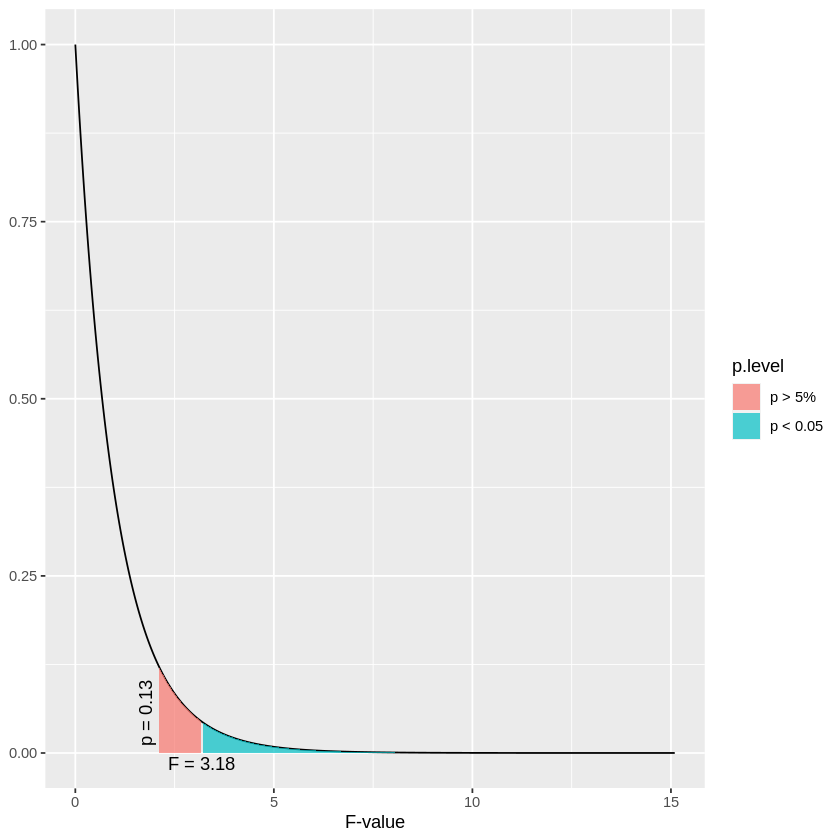

In [278]:
Fe <- test_summary[[1]][1,4]
dist_f(f=Fe, deg.f1=2, deg.f2=50)

Removing outlier did not help. We can not refuse null hypothesis.

### Post-hoc analysis
<br>
Let's get back to the amount of calories in different types of salami. Now we would like to know which groups differ. We know we can not perfom pair t-tests due to higher probability of Type I error. This problem can be solved using some type correction. There are several possibilities, first one is Bonferonni correction. It works as follows, we can lower the $\alpha$ dividing the original value by number of tests p: $\frac{\alpha}{p}$<br>
This method is highly problematic, because real probability is usualy much lower and the whole procedure does not have good statistical power. Usualy the individual tests will have such small α that they will not - incorrectly refuce the null hypothesis.  

In [87]:
# this would be adjusted p-value for pair t-test
adjusted_p <- 0.05 / 3
adjusted_p

[1] 0.01666667

In [88]:
# same effect can be achieved by multiplying each p-value by three

p_vals <- c(
    t.test(cals_beef, cals_poultry)$p.value
    , t.test(cals_beef, cals_meat)$p.value
    , t.test(cals_meat, cals_poultry)$p.value
)
p_vals * 3

[1] 3.686031e-05 2.450174e+00 9.051857e-05

In [89]:
# r have function p.adjust() for such adjustment

p.adjust(p_vals,  method = "bonferroni")

[1] 3.686031e-05 1.000000e+00 9.051857e-05

In [91]:
# R has a function for pairwise t.tests
# https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/pairwise.t.test

result <- pairwise.t.test(
    df_dogs$Calories
    , df_dogs$Type
    , p.adjust.method = "bonferroni"
    , pool.sd=FALSE
)
result$p.value

,Beef,Meat
Meat,1.000000e+00,NA
Poultry,3.686031e-05,9.051857e-05


This approach is problematic because it the type II error - the probability that we will fail to correctly reject null hypothesis. We could end up with an ANOVA that comes out significant but no difference is detected by the post-hoc analysis. The solution is to use Tukey HSD test or use Benjamini-Hochberg p-value adjustment.

In [98]:
# first let's see try BH p-value adjustment using pair t.test

result <- pairwise.t.test(
    df_dogs$Calories
    , df_dogs$Type
    , p.adjust.method = "BH"
    , pool.sd=FALSE
)
result$p.value

,Beef,Meat
Meat,8.167245e-01,NA
Poultry,3.686031e-05,4.525929e-05


In [95]:
# Now let's use Tukey HSD test

model <- TukeyHSD(aov(df_dogs$Calories ~ df_dogs$Type))
model$df_dogs

,diff,lwr,upr,p adj
Meat-Beef,1.855882,-16.82550,20.53726,9.688129e-01
Poultry-Beef,-38.085294,-56.76667,-19.40391,2.767694e-05
Poultry-Meat,-39.941176,-59.36515,-20.51720,2.390087e-05


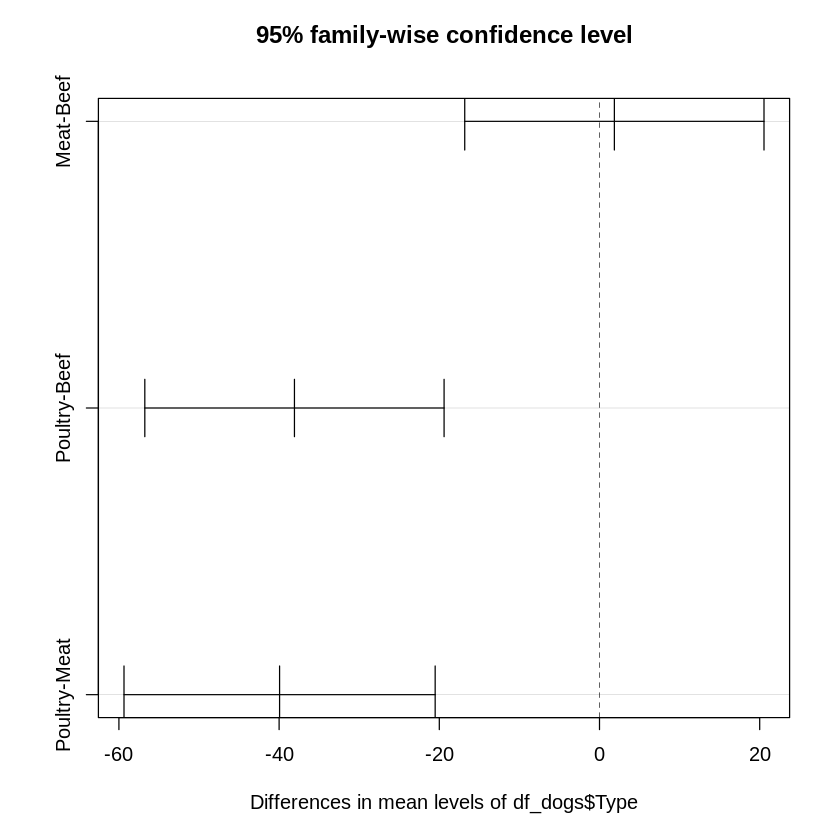

In [97]:
# Visual control of confidence interval for each pair

plot(model)

Again, if the confidence interval does not contain zero, we can reject the null hypothesis at a given significance level for a given pair and say that the two groups are significantly different from each other.

### Influence of more than one factors

Next type of task could be testing for influence of more factors:
https://web.vscht.cz/~spiwokv/statistika/skripta.pdf page 74
<br>
<br>

Suppose we want to test the effect of 
of two different compounds on tissue cell growth. These cells require a metabolite, 
that can be synthesized by two different metabolic pathways. If the cells
add an inhibitor of one or the other metabolic pathway to the cells, then we can assume a small
or no effect on cell growth, because inhibition of one metabolic pathway will compensate for 
by the other pathway. Significant inhibition of growth can only be achieved by simultaneous
by simultaneous action of inhibitors of both pathways. The design of the experiment may look like this, for example: to the first
culture no inhibitor will be added, to the second inhibitor A will be added, to the third inhibitor B will be added and to the fourth both inhibitors will be added simultaneously. For each of the four samples, the
three biological replicates will be performed. Let's generate the model data:


Real life example: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7392756/

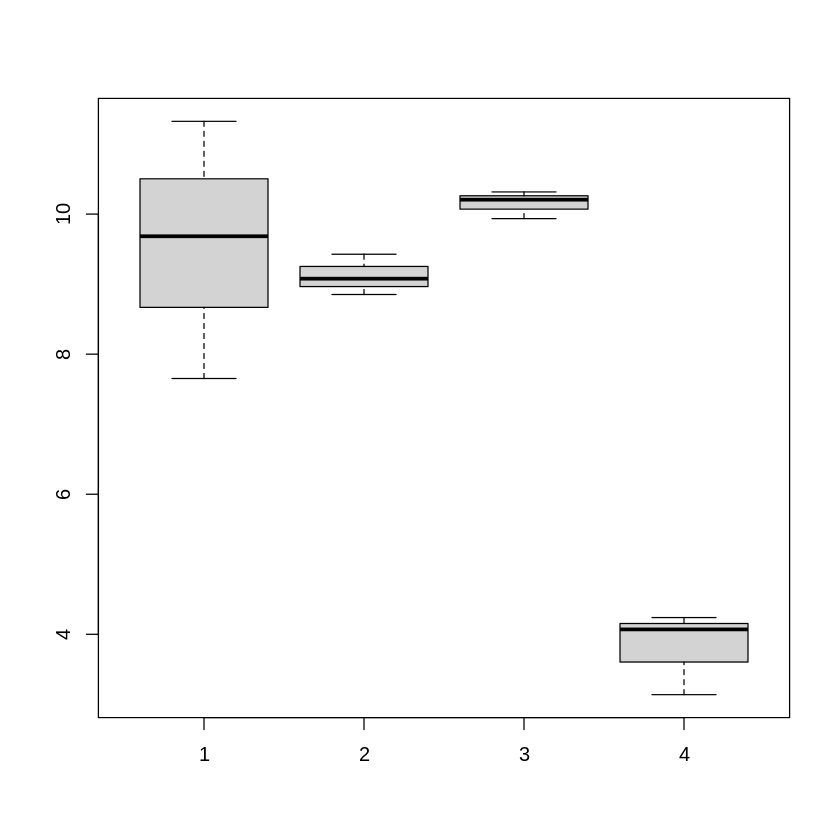

In [129]:
none <- rnorm(3, mean=10)
justA <- rnorm(3, mean=10)
justB <- rnorm(3, mean=10)
AandB <- rnorm(3, mean=3)
all_groups <- c(none, justA, justB, AandB)
boxplot(none, justA, justB, AandB)


In [130]:
x <- c('n', 'y', 'n', 'y')
addedA <- as.factor(c(rep(x, each=3)))
addedA

x <- c('n', 'y')
addedB <- as.factor(c(rep(x, each=6)))
addedB

indata <- data.frame(addedA, addedB, all_groups)
indata

[1] n n n y y y n n n y y y
Levels: n y

[1] n n n n n n y y y y y y
Levels: n y

addedA,addedB,all_groups
<fct>,<fct>,<dbl>
n,n,7.652706
n,n,11.324744
n,n,9.683605
y,n,8.852379
y,n,9.077923
y,n,9.427135
n,y,10.316750
n,y,9.935723
n,y,10.206562


First one factor analysis of variance, where we will test if the cell culture will grow after treatment by A compound or B compound. We are using equation: 
<br>
<br>
$                                                  
all.groups = a*addedA + b*addedC + c
$
<br>
<br>
addedA and addedB are either 1 or 0, depending on which compound was added.

In [131]:
model_1 <- lm(all_groups ~ (addedA + addedB), data=indata)
model_1


Call:
lm(formula = all_groups ~ (addedA + addedB), data = indata)

Coefficients:
(Intercept)      addedAy      addedBy  
     11.029       -3.386       -2.352  


In [132]:
anova(model_1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
addedA,1,34.39444,34.394436,9.145440,0.01438247
addedB,1,16.59722,16.597219,4.413181,0.06503832
Residuals,9,33.84746,3.760829,NA,NA


But we want to also know the effect of both compound at once:
<br>
<br>
$
all.groups = a*addedA + b*addedC + c*addedA*addedB + d
$
<br>
<br>

In [133]:
model_2 <- lm(all_groups~addedA*addedB, data=indata)
model_2


Call:
lm(formula = all_groups ~ addedA * addedB, data = indata)

Coefficients:
    (Intercept)          addedAy          addedBy  addedAy:addedBy  
         9.5537          -0.4345           0.5993          -5.9029  


In [134]:
anova(model_2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
addedA,1,34.394436,34.3944358,35.66691,0.0003335932
addedB,1,16.597219,16.5972187,17.21126,0.0032149504
addedA:addedB,1,26.132876,26.1328757,27.09970,0.0008166631
Residuals,8,7.714587,0.9643233,NA,NA


We can see that interaction of A and B helped the resulting model. We can compare both models using anova() function

In [135]:
anova(model_1, model_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,33.847462,NA,NA,NA,NA
2,8,7.714587,1,26.13288,27.0997,0.0008166631


From the table above we can see that the second model is significantly better, the p-value is much lower.

In general, more complex models will explain experimental data better. But at the same time such models will have increased number of degrees of freedom.
The analysis of variance can also be used to remove all the 
unnecessary elements that don't improve the quality of the model, but add extra degrees of freedom. It is therefore possible to design a simpler model
<br> 
$
all groups = a * addedA * addedB + b
$
<br>
Let's try it: 

In [136]:
# Create an addedboth factor

addedboth <- as.factor(c(rep("n", times=9), rep("y", times=3)))
addedboth


[1] n n n n n n n n n y y y
Levels: n y

In [138]:
model_3 <- lm(all_groups~addedboth)
model_3


Call:
lm(formula = all_groups ~ addedboth)

Coefficients:
(Intercept)   addedbothy  
      9.609       -5.793  


In [142]:
summary(aov(model_3))

            Df Sum Sq Mean Sq F value   Pr(>F)    
addedboth    1  75.51   75.51   80.92 4.16e-06 ***
Residuals   10   9.33    0.93                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [143]:
anova(model_3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
addedboth,1,75.507634,75.5076343,80.91708,4.157145e-06
Residuals,10,9.331483,0.9331483,NA,NA


**anova() vs aov():**
<br>
anova() is best used when we would like to compare fit of nested regression models with some sets of coefficients to see what set of coefficients is best to use.
<br>
aov() is for fitting ANOVA model and viewing the summary table

In [145]:
anova(model_2, model_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8,7.714587,NA,NA,NA,NA
2,10,9.331483,-2,-1.616896,0.8383578,0.4671411


The obtained p-value indicates that the reduction in variance by using a more complex model is not significant. In other words, we do not have enough evidence to assume that the more complex solution  $All groups$ ~ $ addedA*addedB $ model captures the data better than the $All groups $ ~ $ bothadded$ model.

## Dunnett's test
<br>
In biological experiments we need to often test not everything vs everything but everything vs control group. Dunnett test us a multicomparison method that compare each treatment group with a control group. This type of test is also called many-to-one comparison.

In [149]:
install.packages('multcomp')
library('multcomp')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




In [200]:
# Example 1

control <- rnorm(10, mean=100, sd=25)
compound <- rnorm(10, mean=70, sd=30)
placebo <- rnorm(10, mean=90, sd=25)

labels<-gl(3,10)
allgs <- c(control, compound, placebo)

data <- data.frame(labels, allgs)

data$labels <- relevel(data$labels, ref=1)
head(data)

,labels,allgs
,<fct>,<dbl>
1,1,106.45180
2,1,79.44182
3,1,60.70105
4,1,111.26447
5,1,123.73997
6,1,148.06633


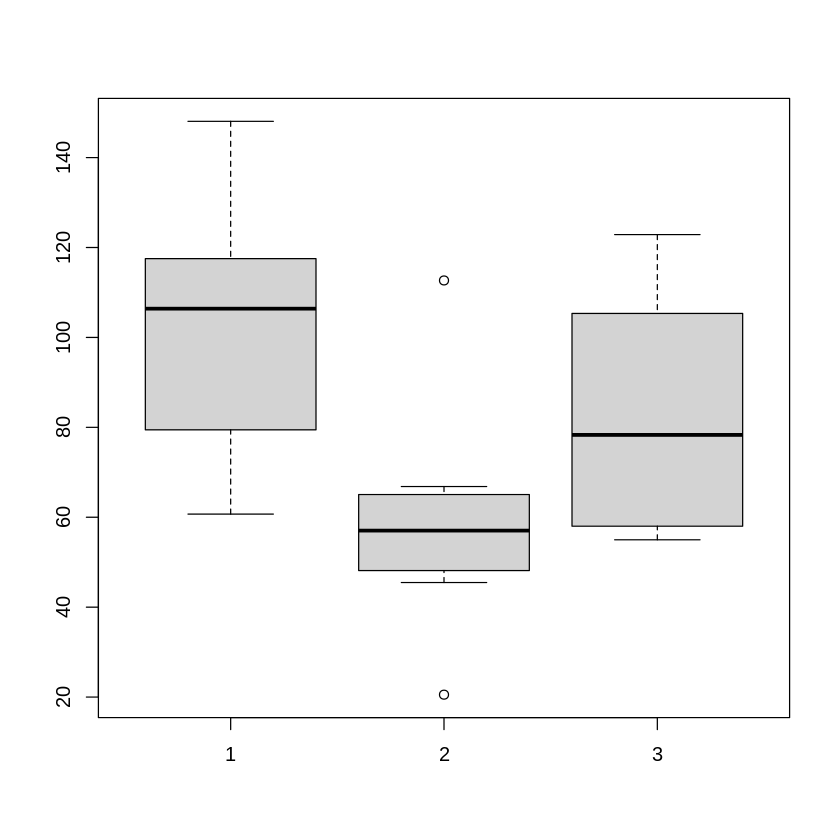

In [201]:
boxplot(control, compound, placebo)

In [202]:
aov_res <- aov(allgs ~ labels, data=data)
summary(aov_res)

            Df Sum Sq Mean Sq F value  Pr(>F)   
labels       2   9065    4533   6.959 0.00365 **
Residuals   27  17587     651                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [203]:
dunnett_res <- glht(aov_res, linfct = mcp(labels="Dunnett"))
summary(dunnett_res)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = allgs ~ labels, data = data)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
2 - 1 == 0   -42.51      11.41  -3.724  0.00176 **
3 - 1 == 0   -19.08      11.41  -1.672  0.18377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


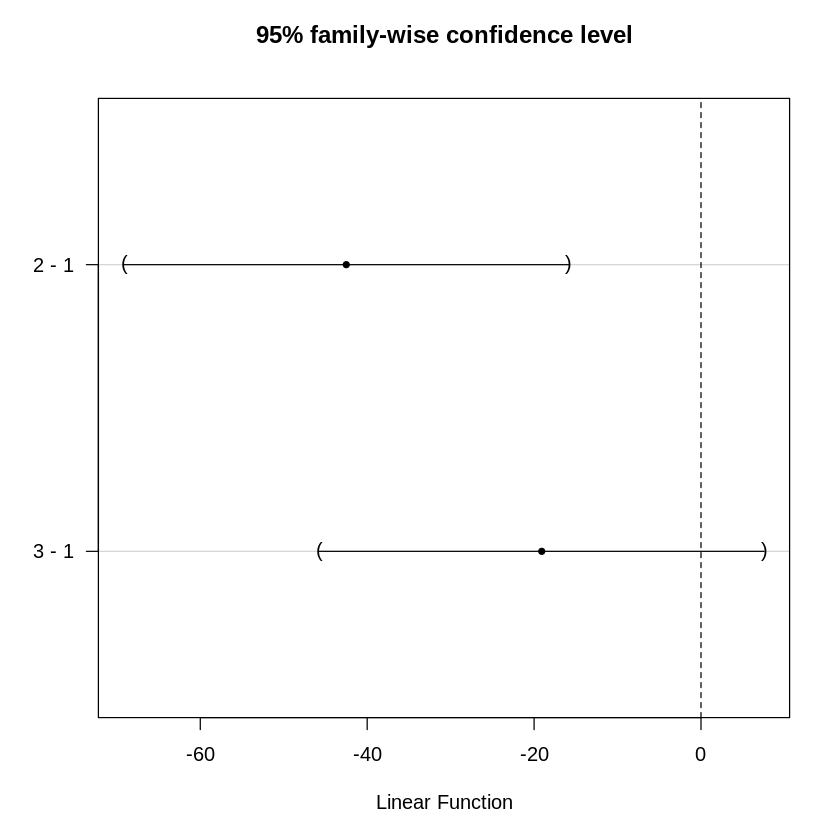

In [204]:
plot(dunnett_res)

In [205]:
# Example 2

data_kosti <- read.table('https://web.vscht.cz/~spiwokv/statistika/kosti.txt', header=T, stringsAsFactors=T)
data_kosti

kosti,mgCa.day
<fct>,<int>
Normal,1200
Normal,1000
Normal,980
Normal,900
Normal,750
Normal,800
Osteopenia,1000
Osteopenia,1100
Osteopenia,700


In [206]:
aov_res <- aov(mgCa.day ~ kosti, data=data_kosti)
summary(aov_res)

            Df Sum Sq Mean Sq F value Pr(>F)
kosti        2 152478   76239   1.395  0.278
Residuals   15 819833   54656               

In [207]:
dunnett_res <- glht(aov_res, linfct = mcp(kosti="Dunnett"))
summary(dunnett_res)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = mgCa.day ~ kosti, data = data_kosti)

Linear Hypotheses:
                           Estimate Std. Error t value Pr(>|t|)
Osteopenia - Normal == 0     -138.3      135.0  -1.025    0.502
Osteoporosis - Normal == 0   -223.3      135.0  -1.655    0.203
(Adjusted p values reported -- single-step method)


In [208]:
confint(dunnett_res)


	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = mgCa.day ~ kosti, data = data_kosti)

Quantile = 2.4394
95% family-wise confidence level
 

Linear Hypotheses:
                           Estimate  lwr       upr      
Osteopenia - Normal == 0   -138.3333 -467.5875  190.9208
Osteoporosis - Normal == 0 -223.3333 -552.5875  105.9208


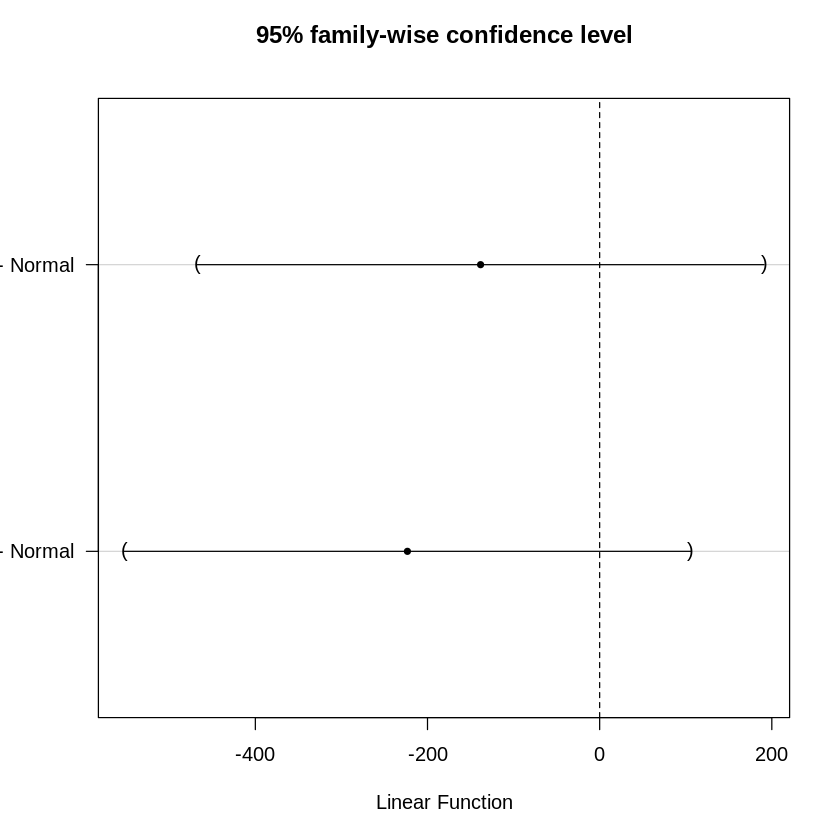

In [209]:
plot(dunnett_res)

We should use statistical testing according to their assumptions:
- sample populations should have normal distribution 
- samples must be independent
- populations variances must be equal
<br>
<br>
If we are not able to prove these assumptions we should use non parametrics test. ANOVA non parametric version is Kruskal-Wallis test - kruskal.test() in R.

In [211]:
kv_res <- kruskal.test(mgCa.day ~ kosti, data=data_kosti)
kv_res


	Kruskal-Wallis rank sum test

data:  mgCa.day by kosti
Kruskal-Wallis chi-squared = 2.3307, df = 2, p-value = 0.3118


In [212]:
names(kv_res)

[1] "statistic" "parameter" "p.value"   "method"    "data.name"

In case of refusing null hypothesis we would do a non-parametric post-hoc test:
- Dunn test
- Conover test
- Nemenyi test
- Pairwise Wilcoxont test

### Bonus

In [198]:
install.packages('ggstatsplot')
library('ggstatsplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘MatrixModels’, ‘hypergeo’, ‘RcppEigen’, ‘reshape’, ‘plyr’, ‘mc2d’, ‘bayestestR’, ‘Rcpp’, ‘prismatic’, ‘BayesFactor’, ‘effectsize’, ‘WRS2’, ‘zeallot’, ‘correlation’, ‘datawizard’, ‘ggrepel’, ‘ggsignif’, ‘insight’, ‘paletteer’, ‘parameters’, ‘patchwork’, ‘performance’, ‘statsExpressions’


You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



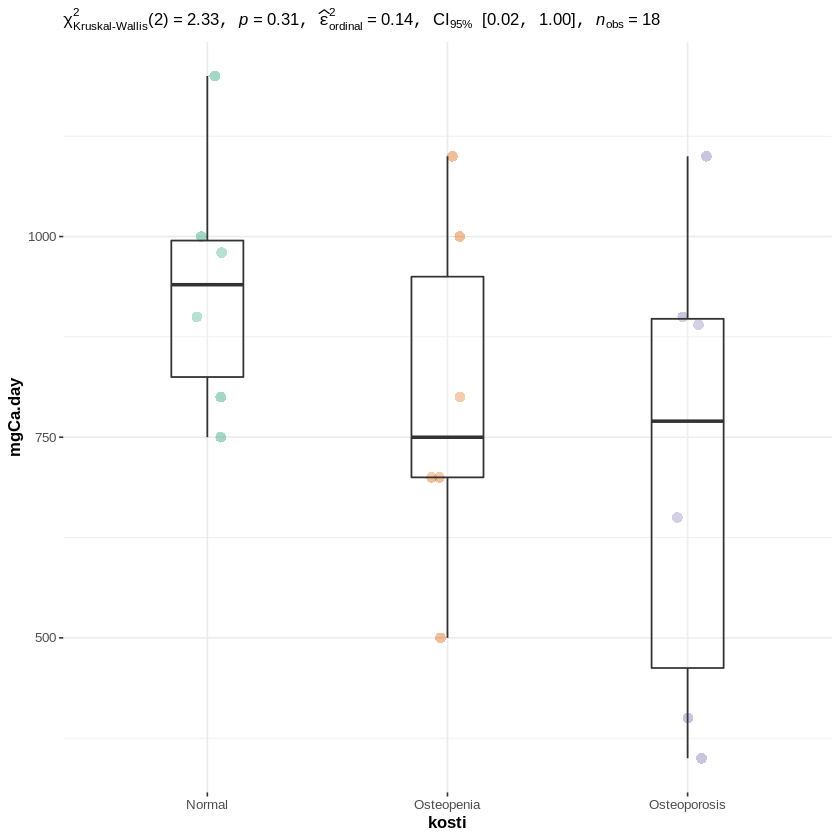

In [223]:
ggbetweenstats(
  data = data_kosti,
  x = kosti,
  y = mgCa.day,
  type = "nonparametric",
  plot.type = "box",
  pairwise.comparisons = F,
  pairwise.display = "all",
  centrality.plotting = FALSE,
  bf.message = FALSE
)